# Intro to Pattern Recognition
# Problem Set 5: Generative Models
### M S Mohamed Fazil
### UB Id : mm549

## Introduction
We will be using neural networks to build a model that classifies hand written digits using thr MNIST database. The MNIST database (Modified National Institute of Standards and Technology Database) is a large collection of handwritten digits which happens to be a state of the art data set to train and test machine learning models using image processing.It consist of 60000 Training samples and 10000 Testing Samples. Each sample image consist of normalized $28X28$ pixels grayscale image stored as 784 dimensional vector for each sample.This is a way of dimension reduction done by the MNIST to use it for model developments.

### Libraries Used
For loading the given MNIST datasets we will be using the mnist library to fetch the data.The MNIST() function will be used to fetch the datasets from the directory './data'. For the purpose of building neural networks and trainning the RBM and Variaional Autoencoders we will be usinf Keras and Tensorflow environment.

In [93]:
import tensorflow as tf
from keras.layers import Lambda, Input, Dense
from keras.models import Model
from keras.losses import mse, binary_crossentropy
from keras import backend as K
import numpy as np
import random
from mnist.loader import MNIST

import matplotlib.pyplot as plt
import os
os.environ["CUDA_VISIBLE_DEVICES"]="1"
%matplotlib inline


m = MNIST('./data')

## Preparing the Datasets
We prepare a dataset which will consist of 1000 training samples with labels where 100 images for each digit and another 1000 testing samples with label where 100 images for each digit. The target consist of a class with ten classification labels.

In [94]:
classes = [0,1,2,3,4,5,6,7,8,9]
xtrain,ytrain = m.load_training()
xtest,ytest = m.load_testing()

xtrain = np.asarray(xtrain).astype(np.float32)/255
ytrain = np.asarray(ytrain).astype(np.float32)
xtest = np.asarray(xtest).astype(np.float32)/255
ytest = np.asarray(ytest).astype(np.float32)

## RBM Defenition
An RBM class with a RBM function is created to to input our parameters and get the learned weight matrix of the RBM.

In [ ]:

class RBM(object):
    #Input the Visible Layer Units,Hidden Layer Units, Learning rate and num of epochs
    def __init__(self,n_components,learning_rate, n_iter):
        self.graph = tf.Graph()
        # We will build the Graph and initialize it
        with self.graph.as_default():
            v_dim=784
            self.v_bias = tf.Variable(tf.random.uniform([1,v_dim],0,1, name = "visible_bias"))
            self.h_bias = tf.Variable(tf.random.uniform([1,n_components],0,1, name = "hidden_bias"))
            self.v_cd = tf.Variable(tf.zeros([1, v_dim], tf.float32, name = "visible_biases"))
            self.h_cd = tf.Variable(tf.zeros([1, n_components], tf.float32, name = "hidden_biases"))
            self.W = tf.Variable(tf.random_normal([v_dim, n_components], 0.01), name="weights")
            self.leraningRate =  tf.Variable(tf.fill([v_dim, n_components], learning_rate), name = "learning_rate")
            self.input_data = tf.placeholder(tf.float32, [v_dim], name = "input_sample")

            #Performing Gibs Sampling
            input = tf.transpose(tf.stack([self.input_data]))
            h_prob = tf.sigmoid(tf.multiply(input,self.W),tf.stack([self.h_bias[0] for i in range(input.shape[0])]))
            H_state = tf.floor(probability + tf.random.uniform(tf.shape(h_prob)))
            v_prob = tf.sigmoid(tf.multiply(input,self.W),tf.stack([self.h_bias[0] for i in range(input.shape[0])]))
            v_state = tf.floor(probability + tf.random.uniform(tf.shape(v_prob)))

            # Performing Contrastive Divergence
            positive_phase = tf.multiply(input,self,h_state)
            negative_phase = tf.multiply(self.v_state,self.n_components)

            #update the weights 
            n_weights = self.W
            n_weights.assign_add(tf.multiply(positive_phase, self.leraning_rate))
            n_weights.assign_sub(tf.multiply(positive_phase, self.leraning_rate))
            self.train = tf.assign(self.W, n_weights) 
            
            #Initilize session with defined graphs
            self.sess = tf.Session()
            init = tf.global_variables_initializer()
            self._sess.run(init)
        def fit(self,xtrain):
            for i in range(0,n_iter):
                with self.sess as s:
                    s.run(self.train,feed_dict={self.xtrain: input})
                    sel.finalW = n_weights.eval()

# https://rubikscode.net/2018/10/22/implementing-restricted-boltzmann-machine-with-python-and-tensorflow/


### Function to Generate Images from Gibbs Sampling and Test Manipulated Input Data

In [95]:
'''
Function to Plot the Sample Images Generated with Gibbs Sampling and ploting samples from 
Test Image's 20% , 50% and 80% Pixels Removed
'''

def remove_pixels(image,p):
    n = int((p/100)*784)
    out = image.copy()
    choices = random.choices(range(784),k=n)
    for i in choices:
        out[i] = 0
    return out


def plot_sampled_images(rbm_model):
    for i in range(0,10):
        img = xtest[i]
        gibbs = rbm_model.gibbs(img)
        original = img.reshape((28,28))
        sampled = gibbs.reshape((28,28))
        fig = plt.figure()

        #randomly remove 20%,50%,80% pixels from test images
        s = xtest[i].copy()
        sample_20 = remove_pixels(s,20)
        sample_20 = rbm_model.gibbs(sample_20)
        sample_20 = sample_20.reshape((28,28))
        
        sample_50 = remove_pixels(s,50)
        sample_50 = rbm_model.gibbs(sample_50)
        sample_50 = sample_50.reshape((28,28))
        
        sample_80 = remove_pixels(s,80)
        sample_80 = rbm_model.gibbs(sample_80)
        sample_80 = sample_80.reshape((28,28))

        # display Original
        a = fig.add_subplot(1, 5, 1)
        imgplot = plt.imshow(original,cmap='gray')
        plt.axis('off')
        a.set_title('Original')

        # Dispaly Sampled
        a = fig.add_subplot(1, 5, 2)
        imgplot = plt.imshow(sampled,cmap='gray')
        plt.axis('off')
        a.set_title('Sampled')

        # Display Sampled 20% Removed
        a = fig.add_subplot(1, 5, 3)
        imgplot = plt.imshow(sample_20,cmap='gray')
        plt.axis('off')
        a.set_title('- 20%')

        # Display Sampled 50% Removed
        a = fig.add_subplot(1, 5, 4)
        imgplot = plt.imshow(sample_50,cmap='gray')
        plt.axis('off')
        a.set_title('- 50%')

        # Display Sampled 80% Removed
        a = fig.add_subplot(1, 5, 5)
        imgplot = plt.imshow(sample_80,cmap='gray')
        plt.axis('off')
        a.set_title('- 80%')
    plt.show()
    

## 1. Restricted Boltzman Machine Algorithm
RBM is an unidirected graphical model which contains visible layer which is the input layer and a hidden layer or the latent layer. The system is defined by energy function 
\begin{equation}
E(x,h) = -h^TWx-c^Tx-b^Th = -\sum_j\sum_kW_{j,k}h_jx_k - \sum_kc_kx_k - \sum_jb_jh_j
\end{equation}
The probability function of the Energy is givrn as
\begin{equation}
p(x,h) = exp(-E(x,h))/Z = exp(h^TWx+c^Tx+b^Th)/Z = \prod_j\prod_jexp(W_{j,k})\prod_kexp(c_kx_k)\prod_jexp(b_jh_j)
\end{equation}
This equation defines the Markov Random field with unary factors and binary factors.
We are given an input dataset $ X\in D $ which is D dimensional. our goal is to learn the joint probability distribution that maximizes the probability over the data which is also known as likehood.
\begin{equation}
p(x) = \sum_{h\in{0,1}^H} = \sum_{h\in{0,1}^H} exp(-E(x,h))/Z = exp(-F(x))/Z
\end{equation}

\begin{equation}
\frac{\partial-\log p\left(\mathbf{x}^{(t)}\right)}{\partial \theta}=\underbrace{E_{\mathbf{h}}\left[\frac{\partial E\left(\mathbf{x}^{(t)}, \mathbf{h}\right)}{\partial \theta} | \mathbf{x}^{(t)}\right]}_{\text { postive phase }}-\underbrace{E_{\mathbf{x}, \mathbf{h}}\left[\frac{\partial E(\mathbf{x}, \mathbf{h})}{\partial \theta}\right]}_{\text { negative phase }}
\end{equation}

To find the intracable estimation in phase $E_{\mathbf{x}, \mathbf{h}}\left[\frac{\partial E(\mathbf{x}, \mathbf{h})}{\partial \theta}\right]$ we will be using Contrastive Divergence Method. We will be replacing estimation over $x$ by probabilistic $p(x)$ obtained from Gibbs Sampling.
Sample $\tilde{ x}= x^k\sim p( x|f h^{k-1})$ 
\begin{aligned}\Rightarrow 
\frac{\partial-\log p\left(\mathbf{x}^{(t)}\right)}{\partial \theta}=&E_{\mathbf{h}}\left[\frac{\partial E\left(\mathbf{x}^{(t)}, \mathbf{h}\right)}{\partial \theta} | \mathbf{x}^{(t)}\right]-E_{\mathbf{x}, \mathbf{h}}\left[\frac{\partial E(\mathbf{x}, \mathbf{h})}{\partial \theta}\right]\cr
=&E_{\mathbf{h}}\left[\frac{\partial E\left(\mathbf{x}^{(t)}, \mathbf{h}\right)}{\partial \theta} | \mathbf{x}^{(t)}\right]-E_{\mathbf{h}}\left[\frac{\partial E(\tilde{\mathbf{x}}, \mathbf{h})}{\partial \theta}\right]
\end{aligned}
Updating the learned Weights.\n

$\mathbf{W} \quad \Longleftarrow \quad \mathbf{W}-\alpha\left(\nabla_{\mathbf{W}}-\log p\left(\mathbf{x}^{(t)}\right)\right) = \mathbf{W}+\alpha\left(\mathbf{h}\left(\mathbf{x}^{(t)}\right) \mathbf{x}^{(t)^{\top}}-\mathbf{h}(\tilde{\mathbf{x}}) \tilde{\mathbf{x}}^{\top}\right)$

$\mathbf{b} \Longleftarrow \mathbf{b}+\alpha\left(\mathbf{h}\left(\mathbf{x}^{(t)}\right)-\mathbf{h}(\tilde{\mathbf{x}})\right)$

$\mathbf{c} \Longleftarrow \mathbf{c}+\alpha\left(\mathbf{x}^{(t)}-\tilde{\mathbf{x}}\right)$

where
$\mathbf h(\mathbf x) = p(\mathbf h|\mathbf x)$

## RBM with 20 Hidden Nodes

In [97]:
rbm_model = RBM(n_components=20,learning_rate=0.01,n_iter = 30)
x = rbm_model.fit(xtrain)

We get a the final Weight Matrix learned using the RBM. 
### Visualizing the 20 components extracted from the Input data.

Shape of the Weight Matrix -  (20, 784)


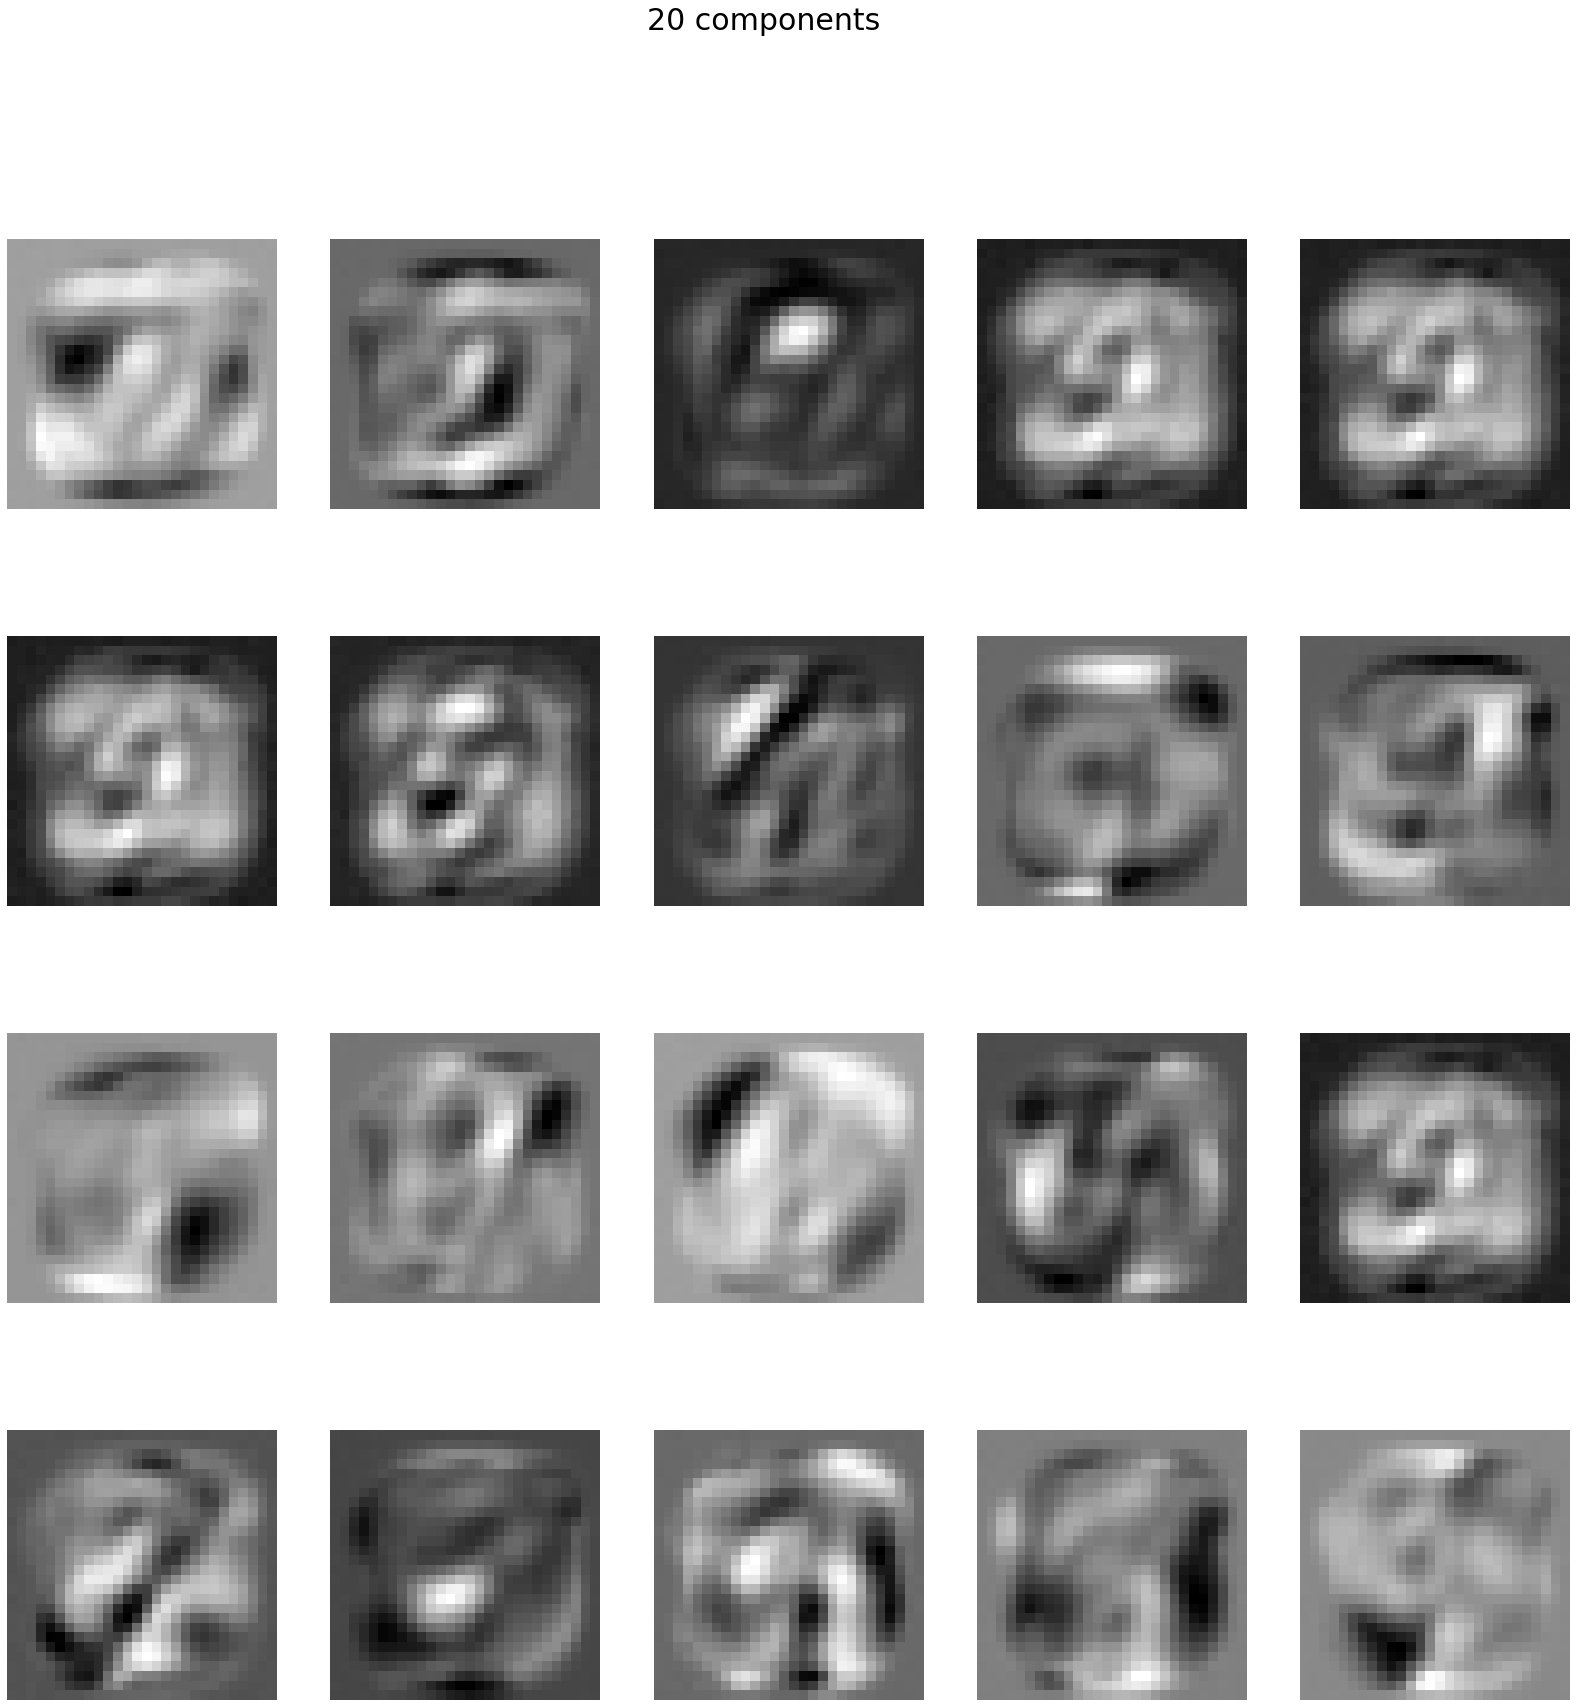

In [98]:
W_20 = rbm_model.components_
print('Shape of the Weight Matrix - ',W_20.shape)
plt.figure(figsize=(28,28))
for i in range(0,W_20.shape[0]):
    plt.subplot(4, 5, i+1)
    plt.axis('off')
    plt.imshow(W_20[i].reshape(28,28),cmap=plt.cm.gray,interpolation='nearest')

plt.suptitle('20 components', fontsize=30);

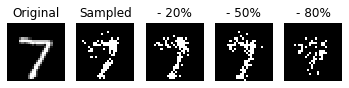

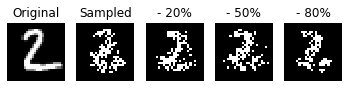

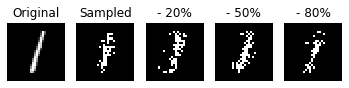

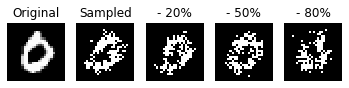

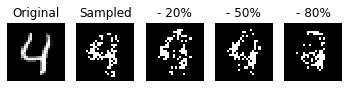

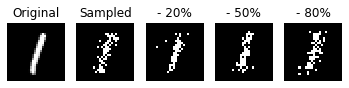

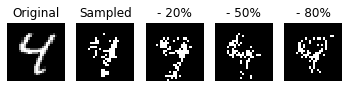

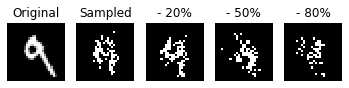

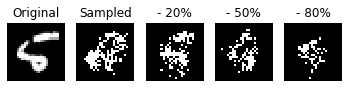

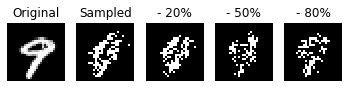

In [99]:
plot_sampled_images(rbm_model)

## RBM with 100 Hidden Nodes

In [100]:
rbm_model = RBM(n_components=100,learning_rate=0.01,n_iter = 30)
x = rbm_model.fit(xtrain)

We get a the final Weight Matrix learned using the RBM. 
### Visualizing the 100 components extracted from the Input data.

Shape of the Weight Matrix -  (100, 784)


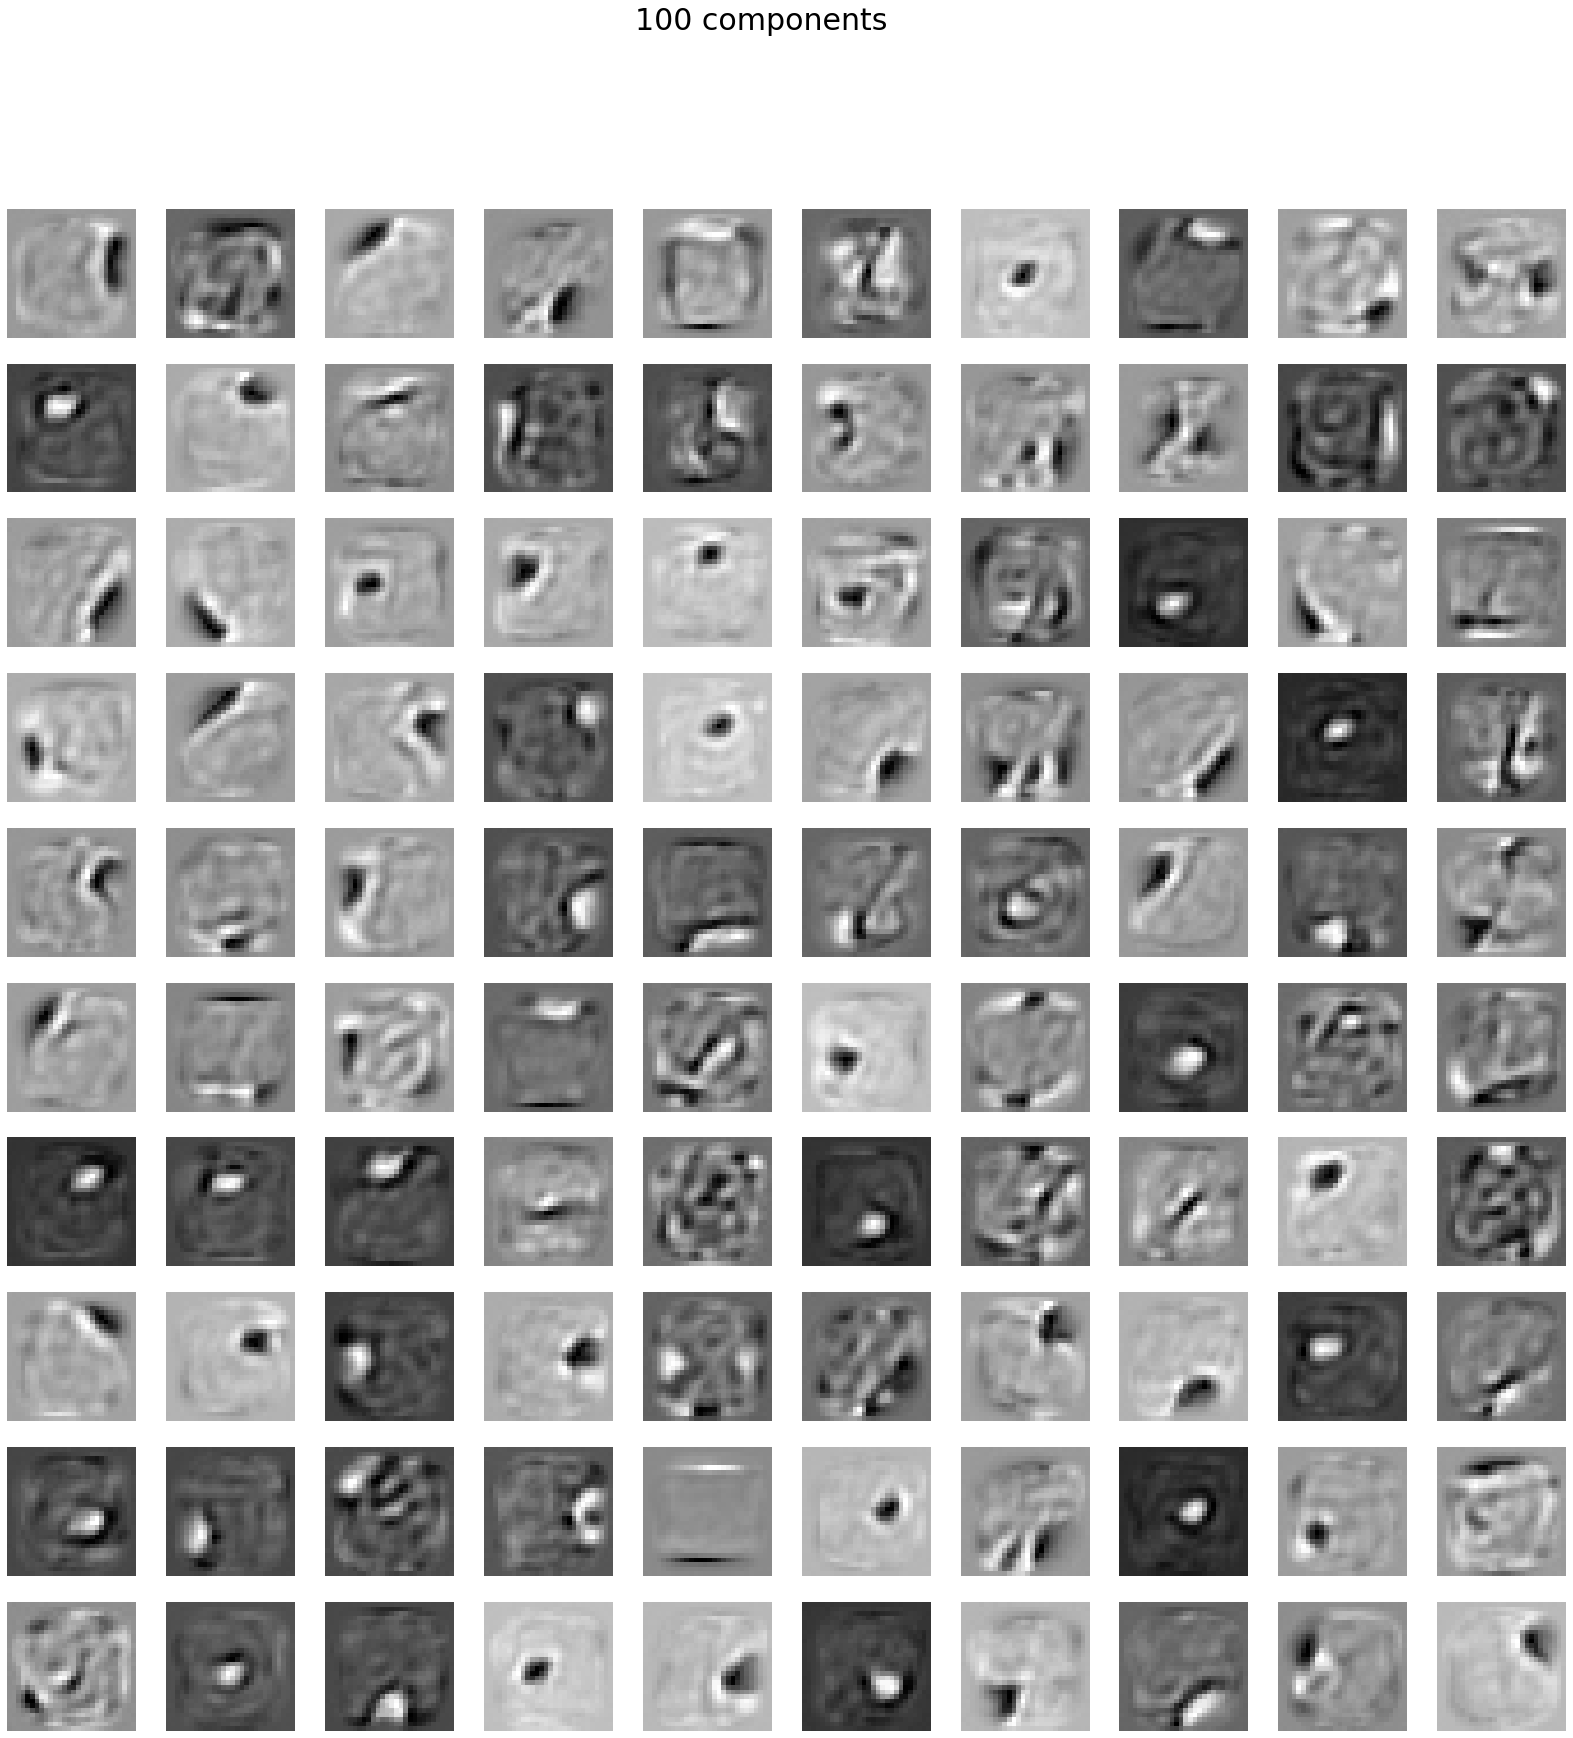

In [101]:
W_100 = rbm_model.components_
print('Shape of the Weight Matrix - ',W_100.shape)
plt.figure(figsize=(28,28))
for i in range(0,W_100.shape[0]):
    plt.subplot(10, 10, i + 1)
    plt.axis('off')
    plt.imshow(W_100[i].reshape(28,28),cmap=plt.cm.gray,interpolation='nearest')

plt.suptitle('100 components', fontsize=30);

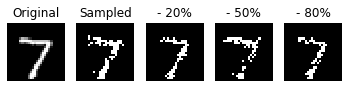

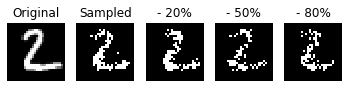

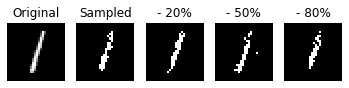

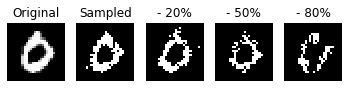

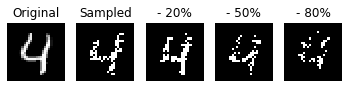

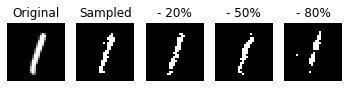

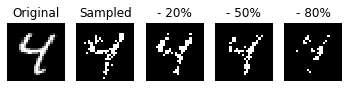

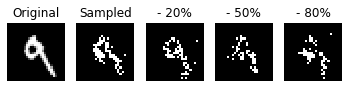

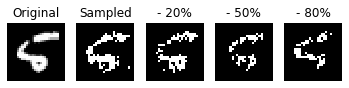

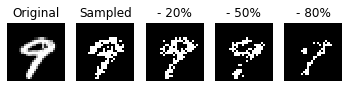

In [102]:
plot_sampled_images(rbm_model)

## RBM with 500 Hidden Nodes

In [103]:
rbm_model = RBM(n_components=500,learning_rate=0.01,n_iter = 30)
x = rbm_model.fit(xtrain)

We get a the final Weight Matrix learned using the RBM. 
### Visualizing the 500 components extracted from the Input data.

Shape of the Weight Matrix -  (500, 784)


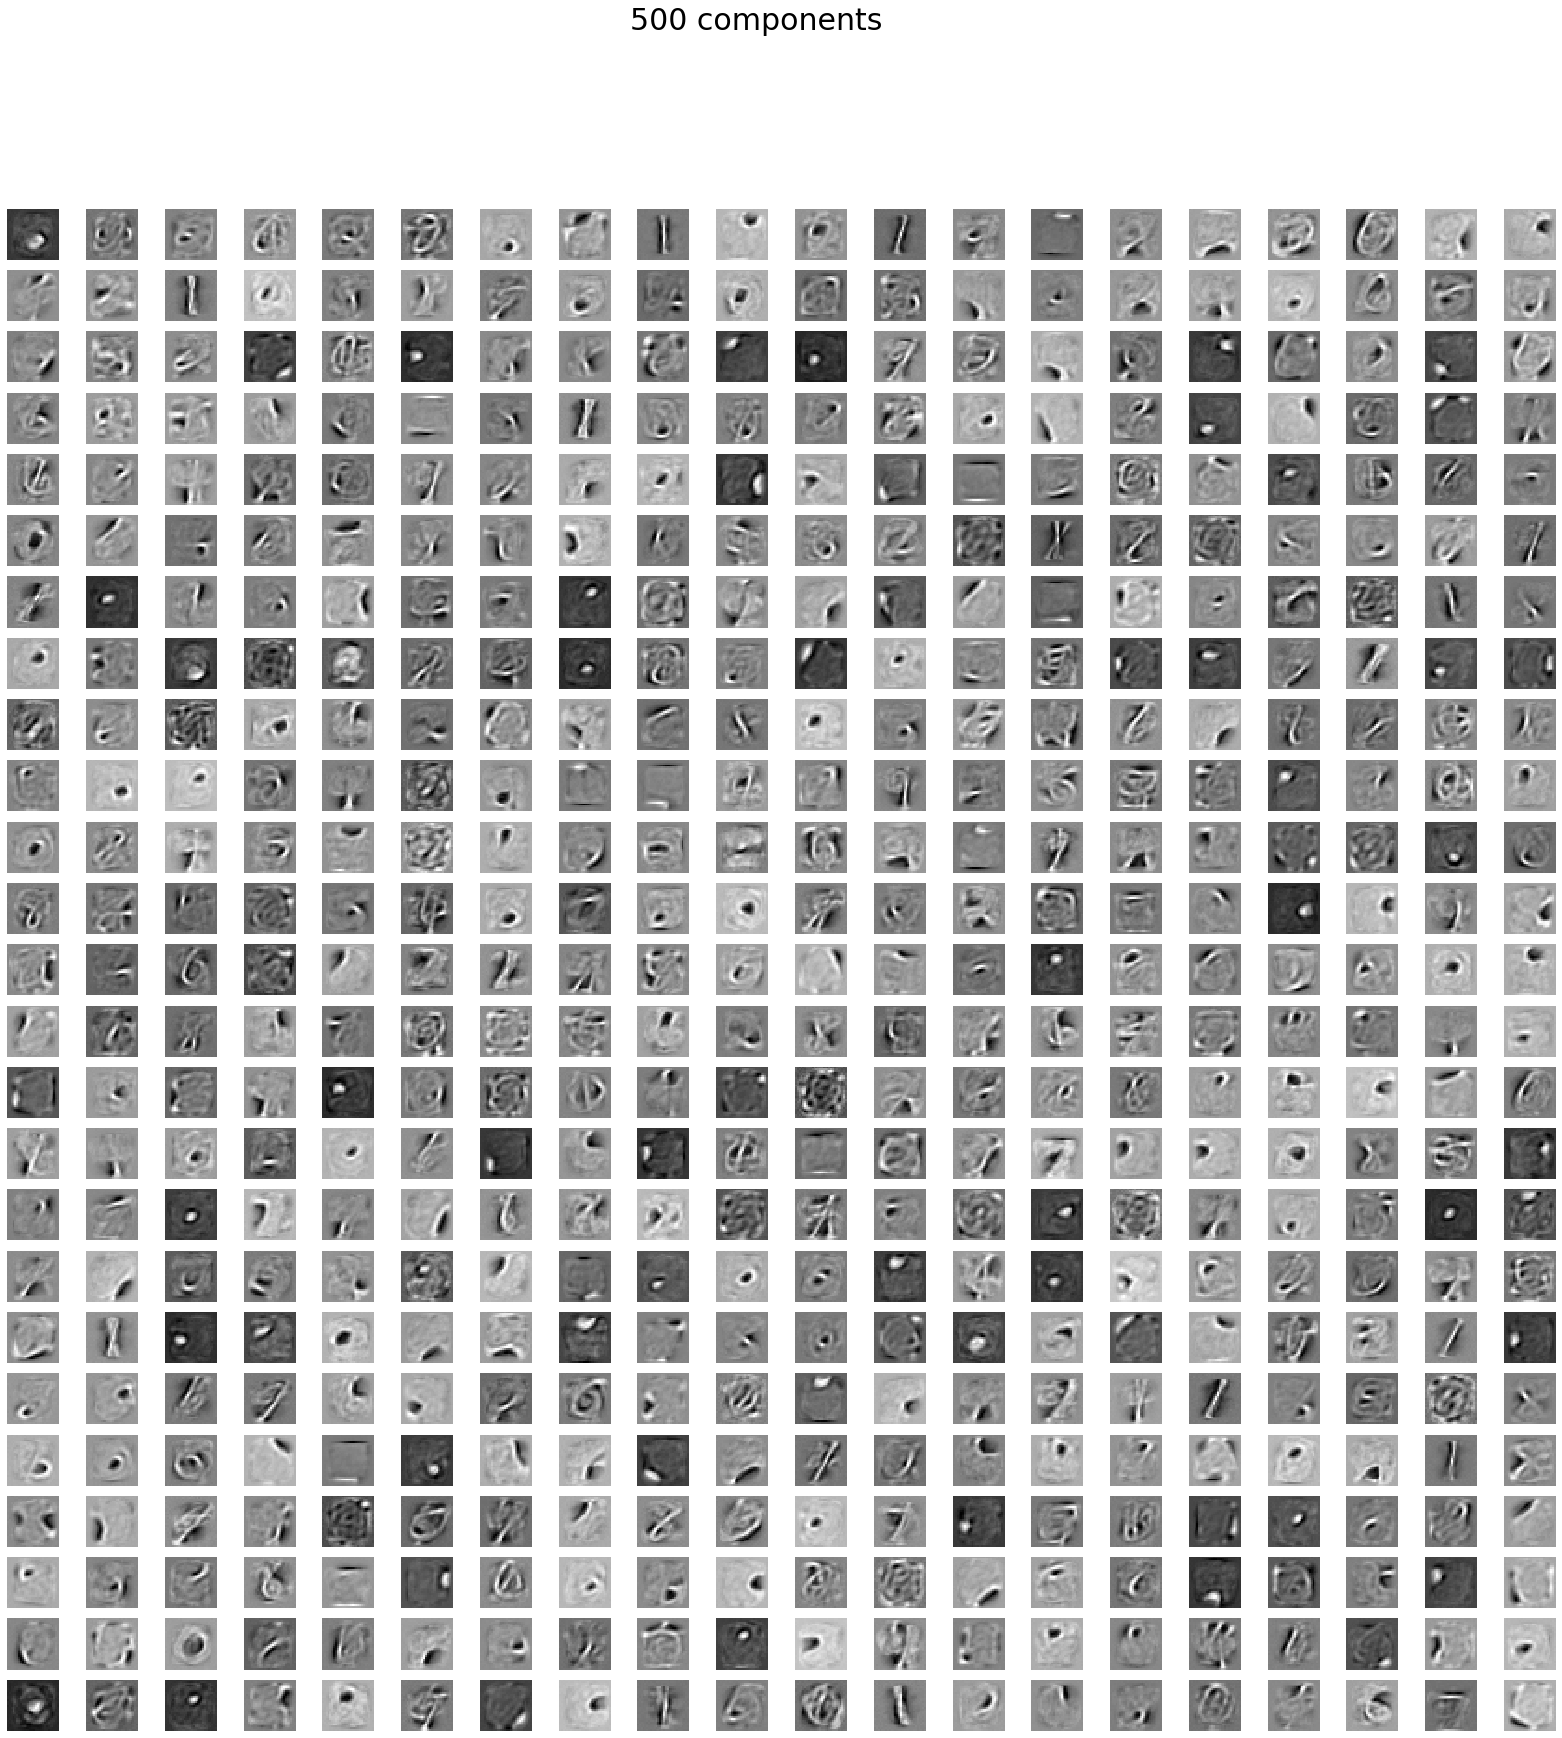

In [104]:
W_500 = rbm_model.components_
print('Shape of the Weight Matrix - ',W_500.shape)
plt.figure(figsize=(28,28))
for i in range(0,W_500.shape[0]):
    plt.subplot(25, 20, i + 1)
    plt.axis('off')
    plt.imshow(W_500[i].reshape(28,28),cmap=plt.cm.gray,interpolation='nearest')

plt.suptitle('500 components', fontsize=30);

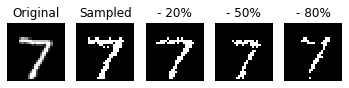

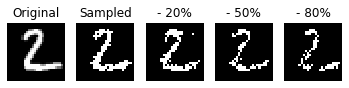

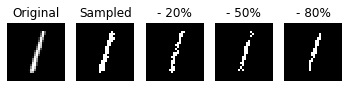

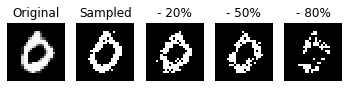

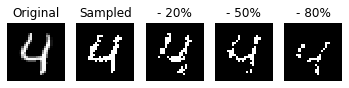

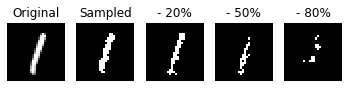

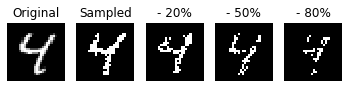

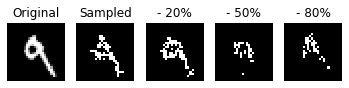

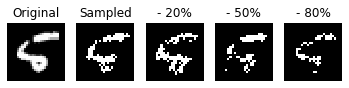

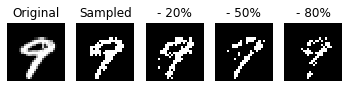

In [105]:
plot_sampled_images(rbm_model)

## 2. Variational Autoencoder Algorithm
An Variational Autoencoder is an generative model which uses Neural Networks. An Autoencoder is a pair of connected network which consist of an Encoder and a Decoder. The encoder takes the input layer and Decoder converts the encoded input data back to its original form.

Encoder $z = \sigma(W x+b)$

Decoder $x' = \sigma'(W'z+b')$

Autoencider Loss Function - $\mathcal L(x,x')=|x-x'|^2=|x-\sigma'\left(W'\sigma(W x+b)+b'\right)|^2$

The Spaese Autoencoder Loss Function - $\mathcal L(x,x')=|x-x'|^2 + \Omega(z)$ , $\Omega$ is a regularizer.
### Variational Autoencoder with Multi-Layered Perceptron
Bernouli MLP Decoder - $\log p(x|z) = \sum_{i=1}^D x_i \log y_i + (1-x_i) \log (1-y_i)$

$y = f_\sigma\left(W_2\tanh (W_1 z+b_1) + b_2\right)$

$z$ is the latent variable

Gaussian MLP Decoder - $\log p(x|z) = \log N(x; \underbrace{W_4 h + b_4}_{\mu}, \underbrace{\exp(W_5 h+b_5)}_{\sigma^2} I)$

$h = \tanh(W_3 z+b_3)$

$z$ is the latent variable


## Building an Variational Autoencoder Model
With varying the Latent Images formed within -3 to 3 for testing purpose.

In [123]:

# Define the reparameterization function 
def reparameterization(Z):
    z_mean ,z_log = Z
    b = K.shape(z_mean)[0]
    d = K.int_shape(z_mean)[1]
    e = K.random_normal(shape=(b,d)) #Random Sampling in a gaussian distribution 
    out = z_mean +K.exp(0.5*z_log)*e
    return out

# Define the Encoder Model
def encoder_model(X):
    x = Dense(intermediate_dim, activation='relu')(X)
    z_mean = Dense(latent_dim, name='z_mean')(x)
    z_log = Dense(latent_dim, name='z_log')(x)
    z = Lambda(reparameterization, output_shape=(latent_dim,), name='z')([z_mean, z_log])
    encoder = Model(X, [z_mean, z_log, z], name='Encoder_Model')
    return encoder, z_mean, z_log

#Define Decoder Model
def decoder_model():
    #Create a Place Holder for the Latent Input Layer
    latent_input_layer = Input(shape=(latent_dim,), name='z_sampling')
    latent = Dense(intermediate_dim, activation='relu')(latent_input_layer)
    outputs = Dense(original_dim, activation='sigmoid')(latent)
    model = Model(latent_input_layer, outputs, name='Decoder_Model')
    return model

def VAE_main(intermediate_dim = 256,latent_dim = 2,epochs = 30,batch_size = 67):
    '''
    Main Function to Build and Train the Variational Auto Encoder
    '''
    original_dim = 28 * 28
    input_shape = (original_dim, )
    
    #Create a Place Holder for the Input Layer
    input_layer = Input(shape=input_shape, name='encoder_input')
    encoder, z_mean, z_log = encoder_model(input_layer)

    #Decoder Model
    decoder = decoder_model()

    #Create the Variational Autocoder Combining the Encoder and Decoder Model    
    output_layer = decoder(encoder(input_layer)[2])
    vae_model = Model(input_layer, output_layer, name='VAE_Model')


    #define the reconstruction loss function with K-L Divergence
    loss = mse(input_layer,output_layer)
    loss = loss * original_dim
    kl = 1 + z_log-K.square(z_mean)-K.exp(z_log)
    kl = (K.sum(kl,axis=-1))*(-0.5)
    model_loss = K.mean(loss+kl)
    vae_model.add_loss(model_loss)
    #Compile the Model with Adam Optimizer
    vae_model.compile(optimizer = 'adam')

    encoder.summary()
    decoder.summary()
    vae_model.summary()
    
    #Train the data
    vae_model.fit(xtrain,epochs=epochs,batch_size=batch_size,validation_data=(xtest,None))
    pred_x = vae_model.predict(xtest)
    
    
    '''
    Generate the Images from the Test Images by Varrying the Encoded Units under -3 to 3
    '''
    
    for i in range(0,10):
        img = np.reshape(xtest[i],(28,28))
        input_img = np.expand_dims(xtest[i], axis = 0)
        encoded_img, var, z = encoder.predict(input_img)
        
        # Varying the Encoded Img(Units) under -3 to 3
        x = encoded_img
        oldR = x.max()-x.min()
        newR = 6
        new_img = (((x-x.min())*newR)/oldR)-3
        decoded_img = decoder.predict(encoded_img)
        varry_decoded_img = decoder.predict(new_img)
        fig = plt.figure()
        # display original
        a = fig.add_subplot(1, 3, 1)
        imgplot = plt.imshow(img,cmap='gray')
        plt.axis('off')
        a.set_title('Original Image')
        
        # display decoded
        a = fig.add_subplot(1, 3, 2)
        imgplot = plt.imshow(decoded_img.reshape(28, 28),cmap='gray')
        plt.axis('off')
        a.set_title('Decoded Image')
        
        # Varying unit display decoded
        a = fig.add_subplot(1, 3, 3)
        imgplot = plt.imshow(varry_decoded_img.reshape(28, 28),cmap='gray')
        plt.axis('off')
        a.set_title('Decoded (-3,+3)')
        
    plt.show()
    

'''
https://blog.keras.io/building-autoencoders-in-keras.html
'''



### 2 Code Unit VAE 

Model: "Encoder_Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 784)          0                                            
__________________________________________________________________________________________________
dense_198 (Dense)               (None, 256)          200960      encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            514         dense_198[0][0]                  
__________________________________________________________________________________________________
z_log (Dense)                   (None, 2)            514         dense_198[0][0]                  
______________________________________________________________________________________

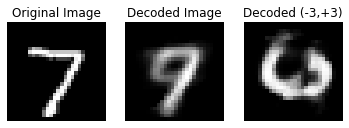

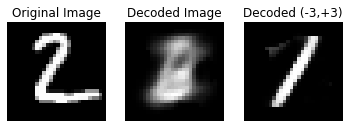

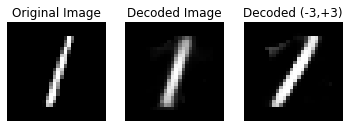

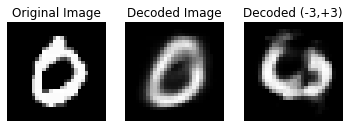

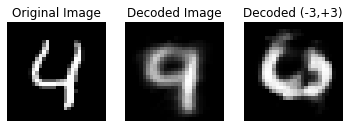

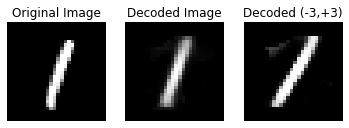

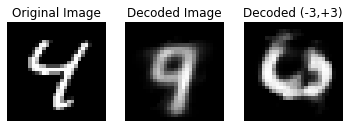

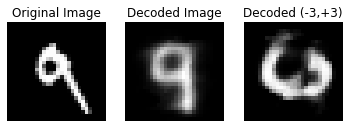

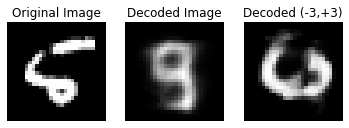

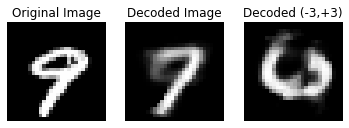

In [124]:
VAE_main(intermediate_dim = 256,latent_dim = 2,epochs = 10,batch_size = 67)


### 8 Code Unit VAE 

Model: "Encoder_Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 784)          0                                            
__________________________________________________________________________________________________
dense_201 (Dense)               (None, 256)          200960      encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            514         dense_201[0][0]                  
__________________________________________________________________________________________________
z_log (Dense)                   (None, 2)            514         dense_201[0][0]                  
______________________________________________________________________________________

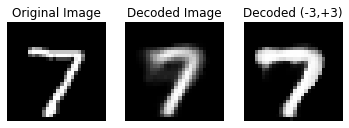

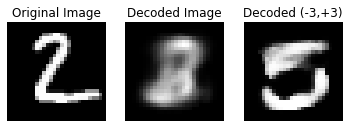

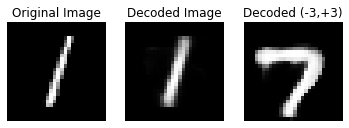

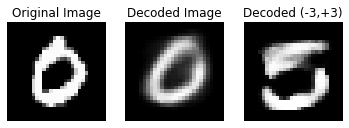

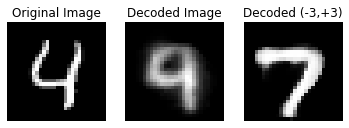

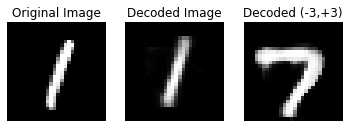

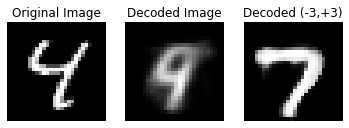

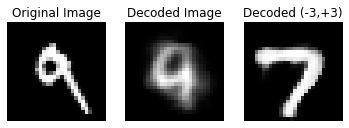

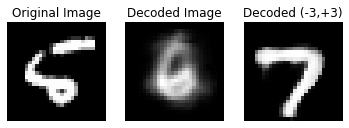

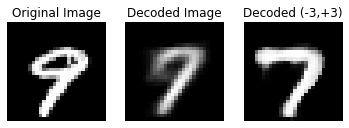

In [125]:
VAE_main(intermediate_dim = 256,latent_dim = 8,epochs = 10,batch_size = 67)


### 16 Code Unit VAE 

Model: "Encoder_Model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
encoder_input (InputLayer)      (None, 784)          0                                            
__________________________________________________________________________________________________
dense_204 (Dense)               (None, 256)          200960      encoder_input[0][0]              
__________________________________________________________________________________________________
z_mean (Dense)                  (None, 2)            514         dense_204[0][0]                  
__________________________________________________________________________________________________
z_log (Dense)                   (None, 2)            514         dense_204[0][0]                  
______________________________________________________________________________________

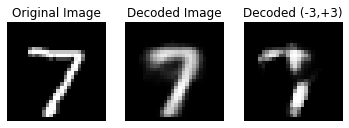

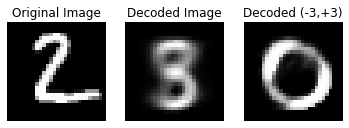

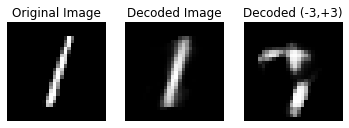

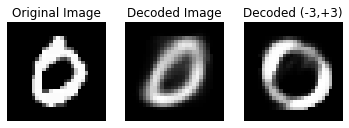

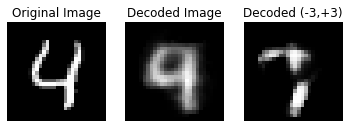

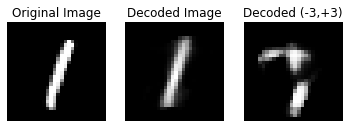

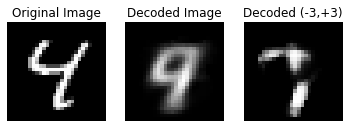

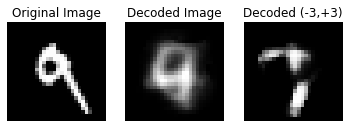

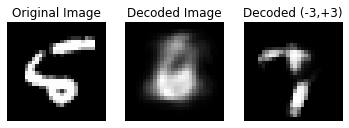

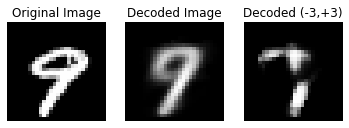

In [126]:
VAE_main(intermediate_dim = 256,latent_dim = 16,epochs = 10,batch_size = 67)
